In [1]:
wp_text_stage0 = [line.strip().lower() for line in open("War_And_Peace.txt",encoding="utf8")]
print(wp_text_stage0[4000:4010])

['“you must look for husbands for them whether you like it or not....”', '', '“well,” said she, “how’s my cossack?” (márya dmítrievna', 'always called natásha a cossack) and she stroked the child’s arm as', 'she came up fearless and gay to kiss her hand. “i know she’s a scamp', 'of a girl, but i like her.”', '', 'she took a pair of pear-shaped ruby earrings from her huge reticule and,', 'having given them to the rosy natásha, who beamed with the pleasure', 'of her saint’s-day fete, turned away at once and addressed herself to']


In [2]:
wp_text_stage1 = ' '.join(wp_text_stage0)

In [3]:
print(len(wp_text_stage1))
print(wp_text_stage1[40000:40200])

3224829
rove my devotion to you and how i respect your father’s memory, i will do the impossible—your son shall be transferred to the guards. here is my hand on it. are you satisfied?”  “my dear benefactor! t


In [5]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [6]:
from nltk.tokenize import sent_tokenize
wp_text_stage2 = sent_tokenize(wp_text_stage1)

In [7]:
print(len(wp_text_stage2))
print(wp_text_stage2[5000:5010])

26313
['after tea, the company went into the sitting room and princess mary was asked to play on the clavichord.', 'anatole, laughing and in high spirits, came and leaned on his elbows, facing her and beside mademoiselle bourienne.', 'princess mary felt his look with a painfully joyous emotion.', 'her favorite sonata bore her into a most intimately poetic world and the look she felt upon her made that world still more poetic.', 'but anatole’s expression, though his eyes were fixed on her, referred not to her but to the movements of mademoiselle bourienne’s little foot, which he was then touching with his own under the clavichord.', 'mademoiselle bourienne was also looking at princess mary, and in her lovely eyes there was a look of fearful joy and hope that was also new to the princess.', '“how she loves me!” thought princess mary.', '“how happy i am now, and how happy i may be with such a friend and such a husband!', 'husband?', 'can it be possible?” she thought, not daring to look at

In [9]:
fluff = set([line.strip() for line in open("stoplist.txt")])

In [10]:
import re
only_alnum = re.compile(r"[^\w]+") ## \w => unicode alphabet
#only_alnum = re.compile(r"[^a-z0-9]") --> This will remove accented characters which are part of many names!

## Replaces one or more occurrence of any characters other unicode alphabets and numbers
def cleanUp(s):
    return re.sub(only_alnum, " ", s).strip()
wp_text_stage3 = [cleanUp(s) for s in wp_text_stage2]
print(wp_text_stage3[4000:4010])

['the whole air reeked with smoke', 'the excited faces of the soldiers were blackened with it', 'some were using their ramrods others putting powder on the touchpans or taking charges from their pouches while others were firing though who they were firing at could not be seen for the smoke which there was no wind to carry away', 'a pleasant humming and whistling of bullets were often heard', 'what is this thought prince andrew approaching the crowd of soldiers', 'it can t be an attack for they are not moving it can t be a square for they are not drawn up for that the commander of the regiment a thin feeble looking old man with a pleasant smile his eyelids drooping more than half over his old eyes giving him a mild expression rode up to bagratión and welcomed him as a host welcomes an honored guest', 'he reported that his regiment had been attacked by french cavalry and that though the attack had been repulsed he had lost more than half his men', 'he said the attack had been repulsed em

In [11]:
def choose_words(s):
    return [w for w in s.split() if len(w) > 2 and w not in fluff]

In [12]:
wp_text_stage4 = [choose_words(sentence) for sentence in wp_text_stage3]
print(wp_text_stage4[4000:4010])

[['whole', 'air', 'reeked', 'smoke'], ['excited', 'faces', 'soldiers', 'were', 'blackened'], ['were', 'using', 'their', 'ramrods', 'others', 'putting', 'powder', 'touchpans', 'taking', 'charges', 'their', 'pouches', 'others', 'were', 'firing', 'were', 'firing', 'could', 'not', 'seen', 'smoke', 'was', 'wind', 'carry', 'away'], ['pleasant', 'humming', 'whistling', 'bullets', 'were', 'often', 'heard'], ['thought', 'prince', 'andrew', 'approaching', 'crowd', 'soldiers'], ['can', 'attack', 'are', 'not', 'moving', 'can', 'square', 'are', 'not', 'drawn', 'commander', 'regiment', 'thin', 'feeble', 'looking', 'old', 'man', 'pleasant', 'smile', 'eyelids', 'drooping', 'half', 'old', 'eyes', 'giving', 'mild', 'expression', 'rode', 'bagratión', 'welcomed', 'host', 'welcomes', 'honored', 'guest'], ['reported', 'regiment', 'had', 'been', 'attacked', 'french', 'cavalry', 'attack', 'had', 'been', 'repulsed', 'had', 'lost', 'half', 'men'], ['said', 'attack', 'had', 'been', 'repulsed', 'employing', 'mili

In [13]:
print(len(wp_text_stage4))

26313


In [14]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
print(stemmer.stem("running"), stemmer.stem("run"), stemmer.stem("runs"), stemmer.stem("runner"))
print(stemmer.stem("guns"), stemmer.stem("gun"), stemmer.stem("gunned"), stemmer.stem("gunning"))

run run run runner
gun gun gun gun


In [15]:
def stem_list(wordlist):
    return [stemmer.stem(word) for word in wordlist]
for n in range(4000, 4010):
    print(wp_text_stage4[n], stem_list(wp_text_stage4[n]))

['whole', 'air', 'reeked', 'smoke'] ['whole', 'air', 'reek', 'smoke']
['excited', 'faces', 'soldiers', 'were', 'blackened'] ['excit', 'face', 'soldier', 'were', 'blacken']
['were', 'using', 'their', 'ramrods', 'others', 'putting', 'powder', 'touchpans', 'taking', 'charges', 'their', 'pouches', 'others', 'were', 'firing', 'were', 'firing', 'could', 'not', 'seen', 'smoke', 'was', 'wind', 'carry', 'away'] ['were', 'use', 'their', 'ramrod', 'other', 'put', 'powder', 'touchpan', 'take', 'charg', 'their', 'pouch', 'other', 'were', 'fire', 'were', 'fire', 'could', 'not', 'seen', 'smoke', 'was', 'wind', 'carri', 'away']
['pleasant', 'humming', 'whistling', 'bullets', 'were', 'often', 'heard'] ['pleasant', 'hum', 'whistl', 'bullet', 'were', 'often', 'heard']
['thought', 'prince', 'andrew', 'approaching', 'crowd', 'soldiers'] ['thought', 'princ', 'andrew', 'approach', 'crowd', 'soldier']
['can', 'attack', 'are', 'not', 'moving', 'can', 'square', 'are', 'not', 'drawn', 'commander', 'regiment', 't

In [16]:
wp_text_stage5 = [stem_list(s) for s in wp_text_stage4]
print(wp_text_stage5[4000:4010])

[['whole', 'air', 'reek', 'smoke'], ['excit', 'face', 'soldier', 'were', 'blacken'], ['were', 'use', 'their', 'ramrod', 'other', 'put', 'powder', 'touchpan', 'take', 'charg', 'their', 'pouch', 'other', 'were', 'fire', 'were', 'fire', 'could', 'not', 'seen', 'smoke', 'was', 'wind', 'carri', 'away'], ['pleasant', 'hum', 'whistl', 'bullet', 'were', 'often', 'heard'], ['thought', 'princ', 'andrew', 'approach', 'crowd', 'soldier'], ['can', 'attack', 'are', 'not', 'move', 'can', 'squar', 'are', 'not', 'drawn', 'command', 'regiment', 'thin', 'feebl', 'look', 'old', 'man', 'pleasant', 'smile', 'eyelid', 'droop', 'half', 'old', 'eye', 'give', 'mild', 'express', 'rode', 'bagratión', 'welcom', 'host', 'welcom', 'honor', 'guest'], ['report', 'regiment', 'had', 'been', 'attack', 'french', 'cavalri', 'attack', 'had', 'been', 'repuls', 'had', 'lost', 'half', 'men'], ['said', 'attack', 'had', 'been', 'repuls', 'employ', 'militari', 'term', 'describ', 'had', 'occur', 'regiment', 'realiti', 'did', 'not'

In [18]:
pip install gensim

  Created wheel for smart-open: filename=smart_open-2.0.0-cp37-none-any.whl size=101347 sha256=a3e577265b268c1bbe1255081c2bbac8c61d6a7be58036c25606aad07fb8e8cd
  Stored in directory: C:\Users\dell\AppData\Local\pip\Cache\wheels\27\65\38\8d7f5fe8d7afb4e4566587b2d1933cec185fba19257836c943
Successfully built smart-open
  Found existing installation: Cython 0.29.13
    Uninstalling Cython-0.29.13:
      Successfully uninstalled Cython-0.29.13
Note: you may need to restart the kernel to use updated packages.


In [19]:
import gensim
from gensim.models import Word2Vec
from gensim.models import word2vec
from gensim.models import Phrases
import logging

In [20]:
num_features = 300    # Word vector dimensionality                      
min_word_count = 50   # Minimum word count                        
num_workers = 4       # Number of threads to run in parallel
context = 6           # Context window size                                                                                    
downsampling = 1e-3   # Downsample setting for frequent words

In [21]:
wp = word2vec.Word2Vec(wp_text_stage5, workers=num_workers, \
            size=num_features, min_count = min_word_count, \
            window = context, sample = downsampling)

In [22]:
wp.init_sims(replace=True)

In [23]:
wp.corpus_count

26313

In [24]:
len(wp.wv.vocab.keys())

1088

In [25]:
sorted(list(wp.wv.vocab))

['1812',
 'abandon',
 'abl',
 'accept',
 'accompani',
 'accord',
 'account',
 'acquaint',
 'act',
 'action',
 'activ',
 'ad',
 'address',
 'adjut',
 'admit',
 'advanc',
 'advantag',
 'affair',
 'affect',
 'afraid',
 'again',
 'age',
 'agit',
 'ago',
 'agre',
 'aid',
 'aim',
 'air',
 'alexand',
 'allow',
 'almost',
 'alon',
 'alpátych',
 'alreadi',
 'also',
 'alway',
 'amus',
 'anatol',
 'andrew',
 'angri',
 'angrili',
 'anim',
 'anna',
 'announc',
 'answer',
 'anxious',
 'apart',
 'appar',
 'appear',
 'appoint',
 'approach',
 'approv',
 'are',
 'arm',
 'armi',
 'arrang',
 'arriv',
 'artilleri',
 'asham',
 'asid',
 'ask',
 'asleep',
 'assum',
 'assur',
 'attack',
 'attend',
 'attent',
 'attract',
 'austerlitz',
 'austrian',
 'author',
 'avoid',
 'await',
 'away',
 'awkward',
 'back',
 'bad',
 'bagratión',
 'balashëv',
 'bald',
 'ball',
 'barclay',
 'bare',
 'battalion',
 'batteri',
 'battl',
 'be',
 'bear',
 'beat',
 'beauti',
 'becam',
 'becom',
 'bed',
 'been',
 'beg',
 'began',
 'beg

In [26]:
words = ["chair","car","man","woman","clean","close","cloud","coat", "confus","danger","daughter","deal","run","walk","count","father","girl","near","neck","spoke","spoken","stand","show","shown"]

In [27]:
wp.wv.save_word2vec_format('wp.bin')

In [28]:
import numpy as np
X = np.array([wp[w] for w in wp.wv.vocab if w in words])
X

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


array([[ 0.10145667, -0.04739043, -0.03527471, ..., -0.02752716,
         0.05861117, -0.03404775],
       [ 0.03663582, -0.06746643, -0.1389599 , ..., -0.07165997,
        -0.06964063, -0.04791345],
       [ 0.12229414, -0.09059678, -0.14731857, ..., -0.08293961,
         0.02711736, -0.03369895],
       ...,
       [ 0.01688024, -0.06073737, -0.04660719, ..., -0.03857739,
         0.06253029, -0.01157704],
       [ 0.07449275, -0.08596878, -0.03023165, ..., -0.02642197,
         0.0775979 , -0.04645737],
       [ 0.0855517 , -0.09324588, -0.07692947, ..., -0.05958848,
         0.07514668, -0.03747967]], dtype=float32)

In [29]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 4)
km.fit(X)
y_kmeans = km.predict(X)

In [30]:
from sklearn import manifold
lle_data = manifold.LocallyLinearEmbedding(n_neighbors=10, n_components=2).fit_transform(X)

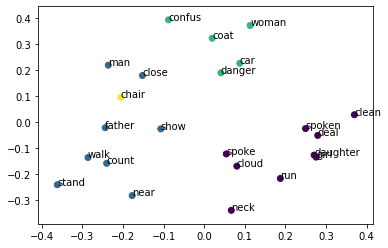

In [32]:
import matplotlib.pyplot as plt
plt.scatter(lle_data[:,0],lle_data[:,1], c =y_kmeans )
for i in range(len(words)-1):
    plt.annotate(words[i], xy = (lle_data[i][0],lle_data[i][1]))
plt.show()